In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
import pandas as pd
data=pd.read_csv(r"C:\Users\shrikant\Desktop\content\SEM2\Machine Learning\LAB\Dataset\Blood Transfusion Service Center.csv")
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
data = data.iloc[:, ::-1]

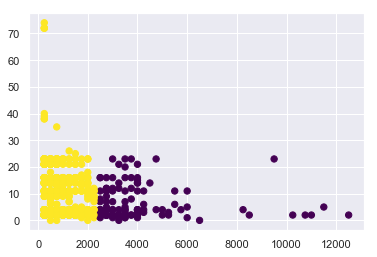

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(data).predict(data)
plt.scatter(data.iloc[:, 2], data.iloc[:, 4], c=labels, s=40, cmap='viridis');

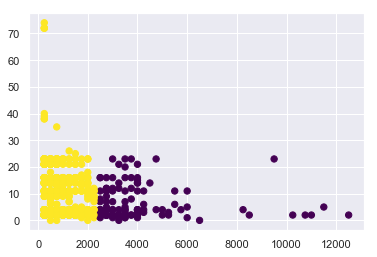

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(data).predict(data)
plt.scatter(data.iloc[:, 2], data.iloc[:, 4], c=labels, s=40, cmap='viridis');

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X.iloc[:, 2], X.iloc[:, 4], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

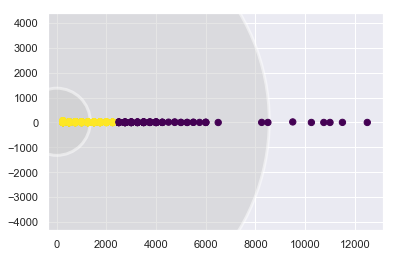

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, data)

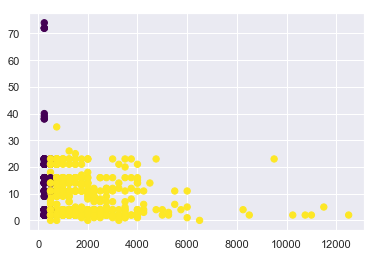

In [15]:
from sklearn import mixture
gmm =  mixture.GaussianMixture(n_components=2).fit(data)
labels = gmm.predict(data)
plt.scatter(data.iloc[:, 2],data.iloc[:, 4], c=labels, s=40, cmap='viridis');

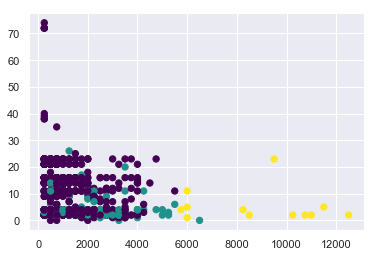

In [17]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3).fit(data)
labels = gmm.predict(data)
plt.scatter(data.iloc[:, 2], data.iloc[:, 4], c=labels, s=40, cmap='viridis');